1. Data Loading and Concatenation

In [1]:
import pandas as pd
import os

# Set your local dataset paths
file_paths = [
    r"C:\Users\ishak\Downloads\UNSW_2018_IoT_Botnet_Full5pc_1.csv",
    r"C:\Users\ishak\Downloads\UNSW_2018_IoT_Botnet_Full5pc_2.csv",
    r"C:\Users\ishak\Downloads\UNSW_2018_IoT_Botnet_Full5pc_3.csv",
    r"C:\Users\ishak\Downloads\UNSW_2018_IoT_Botnet_Full5pc_4.csv"
]

# Load each dataset and store in a list
datasets = []
for path in file_paths:
    df = pd.read_csv(path, low_memory=False)
    print(f"✅ Loaded: {os.path.basename(path)} - Shape: {df.shape}")
    datasets.append(df)

# Concatenate all datasets vertically
combined_df = pd.concat(datasets, ignore_index=True)

# Display combined dataframe info
print("\n✅ Combined Dataset Shape:", combined_df.shape)

# Preview of the merged data.
combined_df.head()


✅ Loaded: UNSW_2018_IoT_Botnet_Full5pc_1.csv - Shape: (1000000, 46)
✅ Loaded: UNSW_2018_IoT_Botnet_Full5pc_2.csv - Shape: (1000000, 46)
✅ Loaded: UNSW_2018_IoT_Botnet_Full5pc_3.csv - Shape: (1000000, 46)
✅ Loaded: UNSW_2018_IoT_Botnet_Full5pc_4.csv - Shape: (668522, 46)

✅ Combined Dataset Shape: (3668522, 46)


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


Data Preprocessing:

Dataset Summary and Data Types Inspection

In [2]:
print(combined_df.describe())
print()
combined_df.info()
print("\nNull values: ", combined_df.isnull().sum())
print("\nDuplicate values: ", combined_df.duplicated().sum())

            pkSeqID         stime   flgs_number  proto_number          pkts  \
count  3.668522e+06  3.668522e+06  3.668522e+06  3.668522e+06  3.668522e+06   
mean   1.834262e+06  1.528050e+09  1.490206e+00  2.095884e+00  7.725963e+00   
std    1.059011e+06  2.581498e+05  8.652444e-01  9.990837e-01  1.155876e+02   
min    1.000000e+00  1.526344e+09  1.000000e+00  1.000000e+00  1.000000e+00   
25%    9.171312e+05  1.528085e+09  1.000000e+00  1.000000e+00  5.000000e+00   
50%    1.834262e+06  1.528096e+09  1.000000e+00  3.000000e+00  7.000000e+00   
75%    2.751392e+06  1.528099e+09  2.000000e+00  3.000000e+00  9.000000e+00   
max    3.668522e+06  1.529381e+09  9.000000e+00  5.000000e+00  7.005700e+04   

              bytes  state_number         ltime           seq           dur  \
count  3.668522e+06  3.668522e+06  3.668522e+06  3.668522e+06  3.668522e+06   
mean   8.690501e+02  3.134390e+00  1.528050e+09  1.213204e+05  2.033479e+01   
std    1.122667e+05  1.186971e+00  2.581507e+05  7.

Data Cleaning

In [3]:
# Drop rows with missing values
cleaned_df = combined_df.dropna()

#drop columns
cols_to_drop = ['pkSeqID', 'category', 'subcategory']


# cols_to_drop = ['pkSeqID', 'category', 'subcategory']

cleaned_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print("Columns dropped successfully")
print("Remaining columns:\n", cleaned_df.columns)



# Optionally reset index
cleaned_df.reset_index(drop=True, inplace=True)

print("After cleaning:")
print("Shape:", cleaned_df.shape)


Columns dropped successfully
Remaining columns:
 Index(['stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr',
       'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number',
       'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP',
       'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack'],
      dtype='object')
After cleaning:
Shape: (3668522, 43)


Label Encoding: Converting Categorical Labels to Numeric

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in cleaned_df.select_dtypes(include=['object', 'category']).columns:
    cleaned_df[column] = cleaned_df[column].astype(str)  # Ensure all values are strings
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    label_encoders[column] = le

print("Label encoding complete")
print(cleaned_df.head())



Label encoding complete
          stime  flgs  flgs_number  proto  proto_number  saddr  sport  daddr  \
0  1.528089e+09     0            1      3             1      1  44407     21   
1  1.528089e+09     0            1      0             2     12      0     10   
2  1.528089e+09     0            1      3             1      1  44409     21   
3  1.528089e+09     0            1      3             1      1  44411     21   
4  1.528089e+09     0            1      3             1      1  44413     21   

   dport  pkts  ...  TnP_Per_Dport  AR_P_Proto_P_SrcIP  AR_P_Proto_P_DstIP  \
0   6650     8  ...            772            1.142970             1.12704   
1      0     2  ...              8            0.003857         15267.20000   
2   6650     8  ...            772            1.142970             1.12704   
3   6650     8  ...            772            1.142970             1.12704   
4   6650     8  ...            772            1.142970             1.12704   

   N_IN_Conn_P_DstIP  N_IN

Data visualization

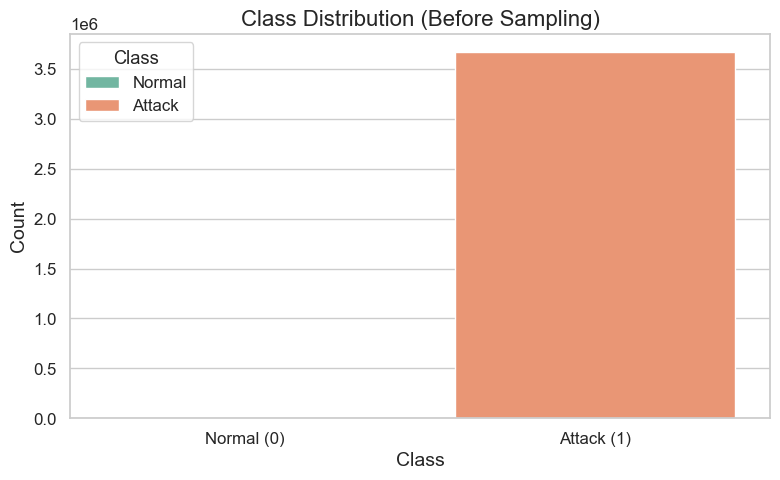

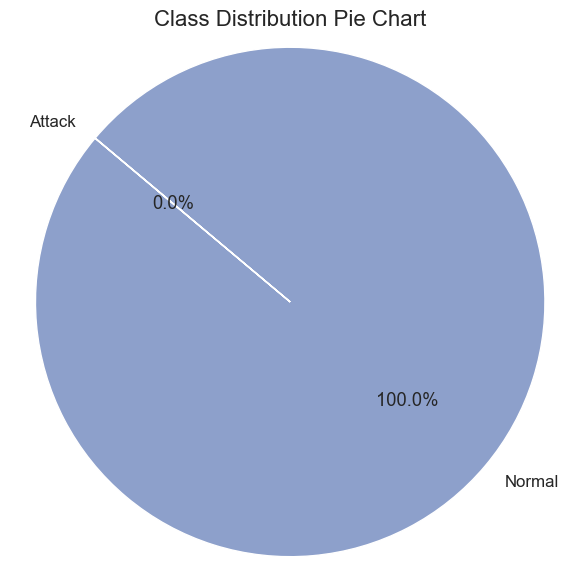

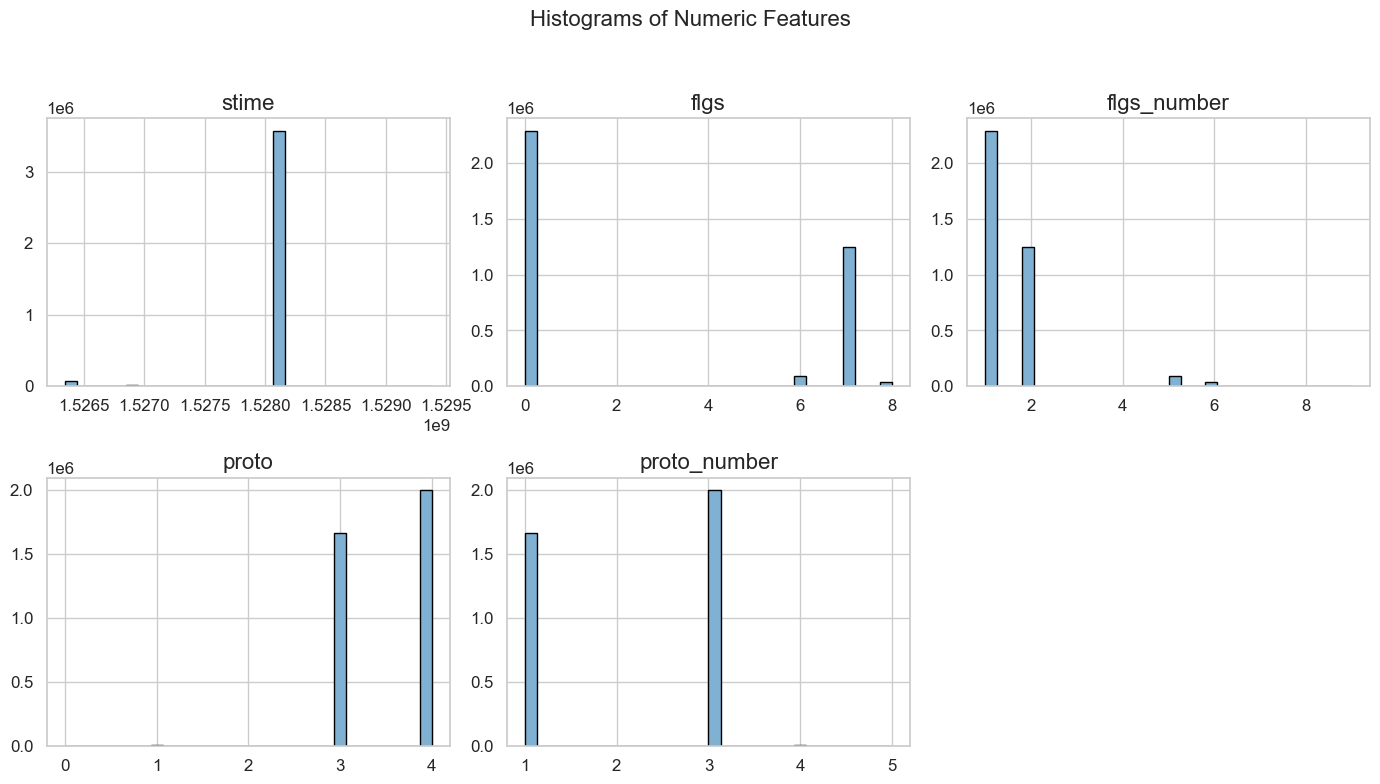

C:\Users\ishak\AppData\Local\Temp\ipykernel_10052\3776723290.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, y=col, x='attack', palette=["#a1dab4", "#41b6c4"])
C:\Users\ishak\AppData\Local\Temp\ipykernel_10052\3776723290.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, y=col, x='attack', palette=["#a1dab4", "#41b6c4"])
C:\Users\ishak\AppData\Local\Temp\ipykernel_10052\3776723290.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, y=col, x='attack', palette=["#a1dab4", "#41b6c4"])


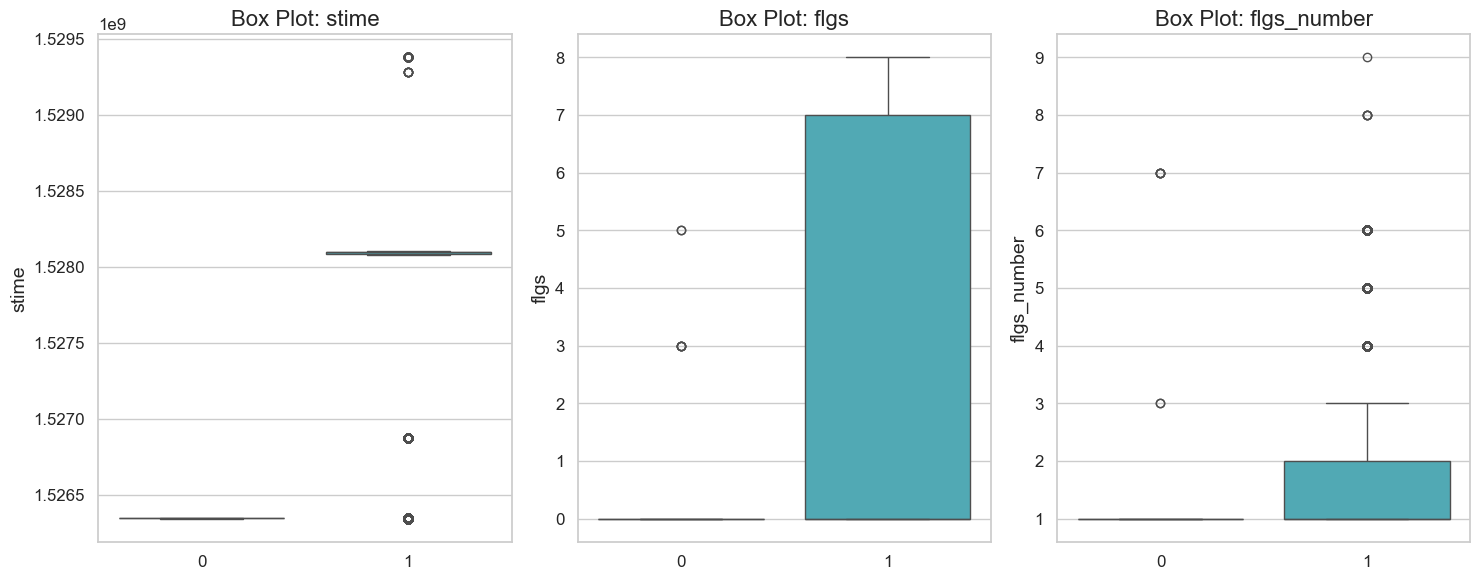

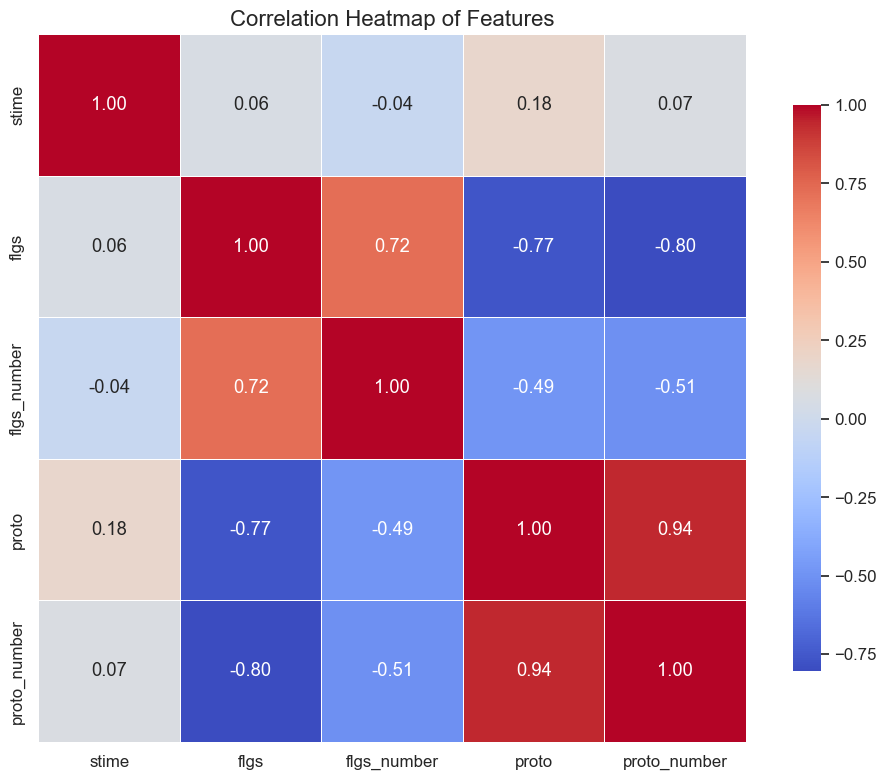

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic theme and font scale
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

# 1. Bar Chart: Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned_df, x='attack', hue='attack', palette=["#66c2a5", "#fc8d62"])
plt.title("Class Distribution (Before Sampling)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'Attack (1)'])
plt.legend(title="Class", labels=["Normal", "Attack"])
plt.tight_layout()
plt.show()

# 2. Pie Chart: Class Proportions
plt.figure(figsize=(6, 6))
class_counts = cleaned_df['attack'].value_counts()
colors = ["#8da0cb", "#e78ac3"]
plt.pie(class_counts, labels=["Normal", "Attack"], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Class Distribution Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Histograms: Distribution of Numeric Features 
numeric_cols = cleaned_df.select_dtypes(include='number').columns[:5]
cleaned_df[numeric_cols].hist(bins=30, figsize=(14, 8), layout=(2, 3), color="#80b1d3", edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 4. Box Plots: Outlier Detection 
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols[:3]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=cleaned_df, y=col, x='attack', palette=["#a1dab4", "#41b6c4"])
    plt.title(f"Box Plot: {col}")
    plt.xlabel("")
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap 
plt.figure(figsize=(10, 8))
corr = cleaned_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()




Data Balancing process using SMOTE and Undersampling

In [6]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Encode Categorical Columns ---
df = cleaned_df.copy()
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# --- Step 2: Split into Classes ---
df_normal = df[df['attack'] == 0]
df_attack = df[df['attack'] == 1]

# --- Step 3: Undersample Attack to 97,813 ---
df_attack_downsampled = df_attack.sample(n=97813, random_state=42)

# --- Step 4: SMOTE on Normal to 58,688 ---
X_normal = df_normal.drop(columns=['attack'])
y_normal = df_normal['attack']

# Add a few attack samples to prevent SMOTE single-class error
df_attack_sample = df_attack.sample(n=5, random_state=42)
X_extra = pd.concat([X_normal, df_attack_sample.drop(columns=['attack'])], axis=0)
y_extra = pd.concat([y_normal, df_attack_sample['attack']], axis=0)

smote = SMOTE(sampling_strategy={0: 58688}, random_state=42)
X_res, y_res = smote.fit_resample(X_extra, y_extra)

# Filter out only the newly SMOTEd Normal records
X_res_final = X_res[y_res == 0]
y_res_final = y_res[y_res == 0]

df_normal_upsampled = pd.DataFrame(X_res_final, columns=X_normal.columns)
df_normal_upsampled['attack'] = y_res_final

# --- Step 5: Combine & Shuffle Final Dataset ---
df_resampled = pd.concat([df_normal_upsampled, df_attack_downsampled], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Final Summary
print("Final Resampled Dataset:")
print("Shape:", df_resampled.shape)
print("Class Distribution:\n", df_resampled['attack'].value_counts())

Final Resampled Dataset:
Shape: (156501, 43)
Class Distribution:
 attack
1    97813
0    58688
Name: count, dtype: int64


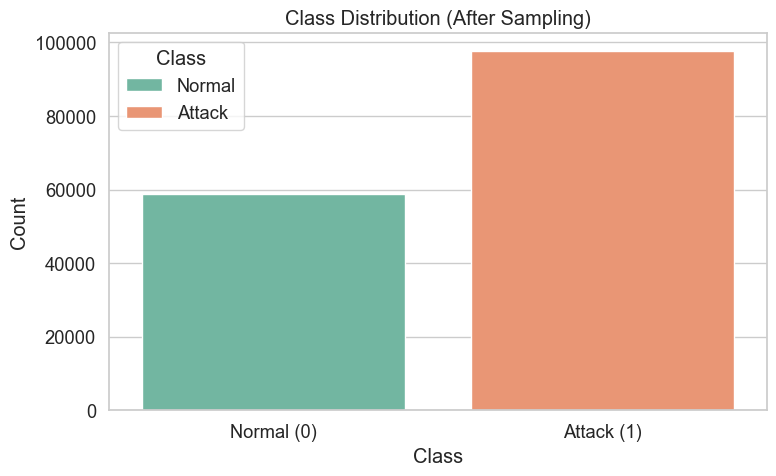

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Bar chart for class distribution after sampling
plt.figure(figsize=(8, 5))
sns.countplot(data=df_resampled, x='attack', hue='attack', palette=["#66c2a5", "#fc8d62"])
plt.title("Class Distribution (After Sampling)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal (0)', 'Attack (1)'])
plt.legend(title="Class", labels=["Normal", "Attack"])
plt.tight_layout()
plt.show()


Feature Scaling Using StandardScaler:

Import StandardScaler from sklearn to perform Z-score normalization

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Use the final balanced dataset
X = df_resampled.iloc[:, :-1]
y = df_resampled.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling done")
print(pd.DataFrame(X_scaled).head())


Feature scaling done
         0         1         2         3         4         5         6   \
0 -1.253931 -0.557143 -0.419092  0.588907  0.707335 -0.549717  1.010297   
1 -1.258731 -0.557143 -0.419092  0.588907  0.707335  1.016360  1.354542   
2 -1.252357 -0.557143 -0.419092 -0.602264 -0.350019  2.973957  0.356322   
3  0.809555 -0.557143 -0.419092  0.588907  0.707335 -0.549717  0.379994   
4 -1.252983 -0.557143 -0.419092  0.588907  0.707335 -0.549717  0.849252   

         7         8         9   ...        32        33        34        35  \
0  2.604814 -0.378025 -0.150021  ...  1.339494 -0.171878 -0.052169 -0.080848   
1  2.656593  0.121906 -0.150182  ...  2.505142 -0.173925 -0.042092 -0.051744   
2 -0.553702  0.020204  1.655333  ...  1.392621  2.902792 -0.051395 -0.082325   
3 -0.553702  0.558120 -0.149057  ... -0.574677 -0.142873 -0.052480 -0.083589   
4  0.171203 -0.376800 -0.150342  ...  1.324379 -0.172607 -0.009170 -0.083596   

         36        37        38        39      

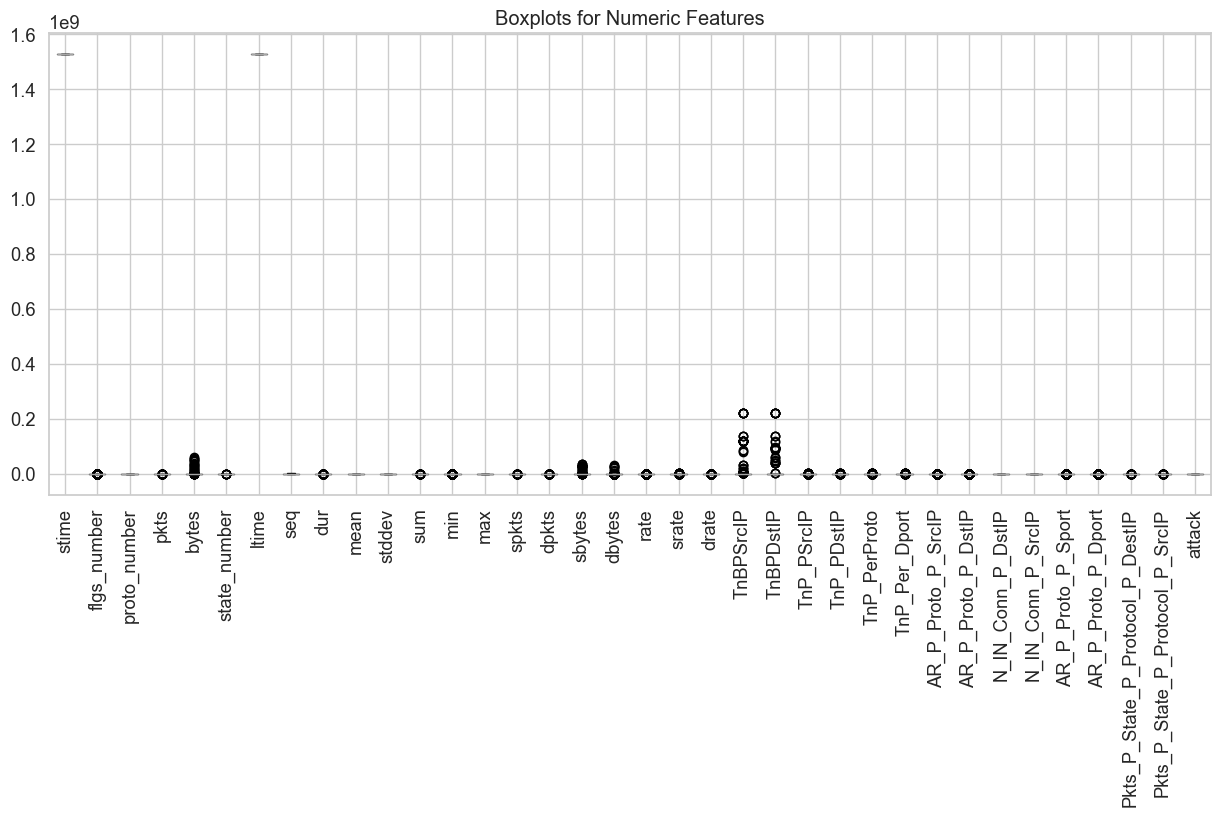

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample a subset for plotting (speed)
sampled_df = df_resampled.sample(1000, random_state=42)

# Plot boxplots for numeric columns
numeric_cols = sampled_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 6))
sampled_df[numeric_cols].boxplot(rot=90)
plt.title("Boxplots for Numeric Features")
plt.show()


Feature Selection:

Filter Method: Chi-square

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

# Assume X and y are your features and labels
X_chi2 = X.copy()
X_chi2 = X_chi2.astype(int)  # Chi-square needs non-negative integers

chi2_selector = SelectKBest(score_func=chi2, k=20)
X_chi2_selected = chi2_selector.fit_transform(X_chi2, y)

selected_chi2_features = X.columns[chi2_selector.get_support()]
print("Chi2 Selected Features:\n", selected_chi2_features.tolist())


Chi2 Selected Features:
 ['stime', 'pkts', 'bytes', 'ltime', 'seq', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_DstIP', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP']


Wrapper Method: Recursive Feature Elimination(RFE)

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=20)
X_rfe = rfe.fit_transform(X, y)

selected_rfe_features = X.columns[rfe.support_]
print("RFE Selected Features:\n", selected_rfe_features.tolist())


RFE Selected Features:
 ['sport', 'dport', 'bytes', 'seq', 'dur', 'sbytes', 'dbytes', 'rate', 'TnBPSrcIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP']


Embedded Method : Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]

selected_rf_features = X.columns[indices]
print("Random Forest Important Features:\n", selected_rf_features.tolist())


Random Forest Important Features:
 ['rate', 'sbytes', 'bytes', 'pkts', 'Pkts_P_State_P_Protocol_P_SrcIP', 'spkts', 'N_IN_Conn_P_SrcIP', 'daddr', 'seq', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'Pkts_P_State_P_Protocol_P_DestIP', 'state', 'TnBPDstIP', 'TnP_PDstIP', 'ltime', 'stime', 'dport', 'N_IN_Conn_P_DstIP']


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)
print("PCA Reduced Shape:", X_pca.shape)


PCA Reduced Shape: (156501, 19)


In [14]:
# Combine the top features from Chi2, RFE, and RF
hybrid_features = list(set(selected_chi2_features) |
                       set(selected_rfe_features) |
                       set(selected_rf_features))

X_hybrid = X[hybrid_features]
print("Hybrid Selected Features Count:", len(hybrid_features))


Hybrid Selected Features Count: 30


C:\Users\ishak\AppData\Local\Temp\ipykernel_10052\1410934100.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_scores, y=chi2_features, palette='Blues_d')


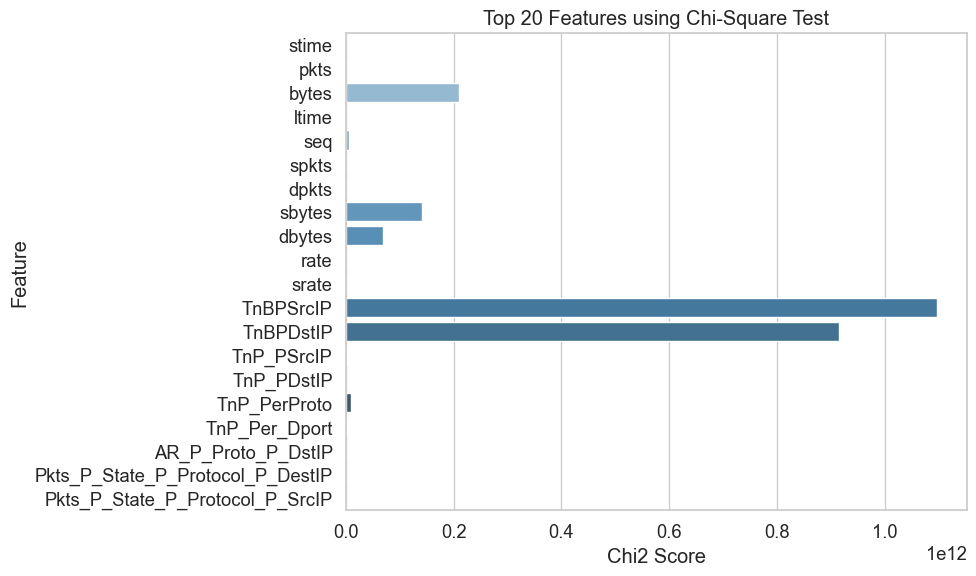

C:\Users\ishak\AppData\Local\Temp\ipykernel_10052\1410934100.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=rf_features, palette='Oranges_d')


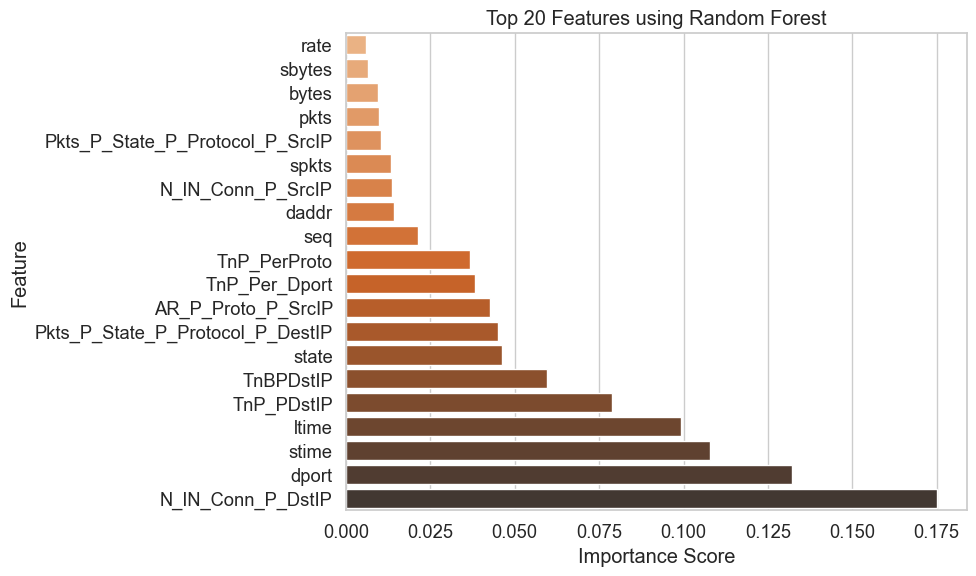

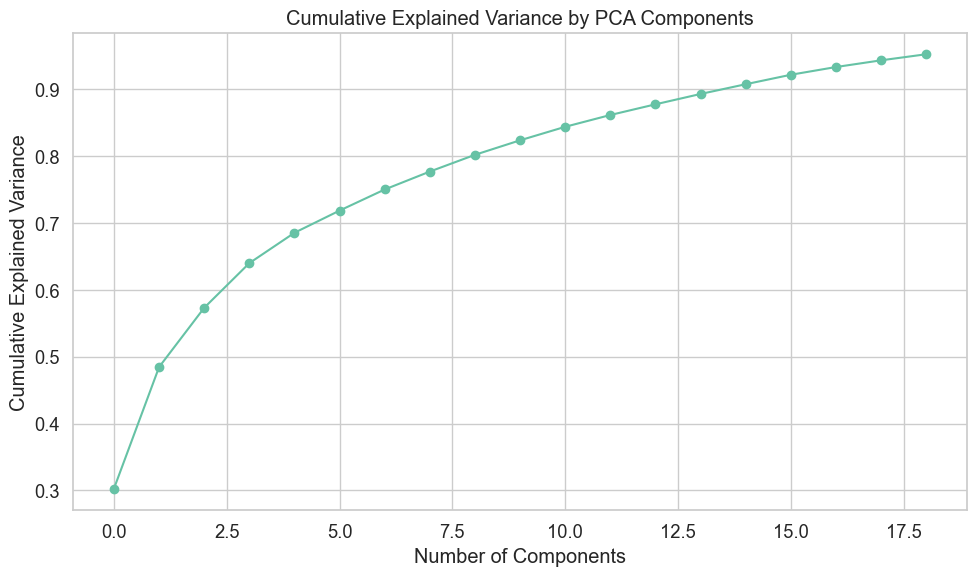

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scores from SelectKBest
# Ensure chi2_scores and chi2_features have the same length
chi2_scores = chi2_selector.scores_[chi2_selector.get_support()]
chi2_features = selected_chi2_features[:len(chi2_scores)]  # Match the length

plt.figure(figsize=(10, 6))
sns.barplot(x=chi2_scores, y=chi2_features, palette='Blues_d')
plt.title("Top 20 Features using Chi-Square Test")
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



# Random Forest Feature Importance

rf_importances = importances[indices]
rf_features = X.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=rf_features, palette='Oranges_d')
plt.title("Top 20 Features using Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# PCA Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()



Dataset Splitting: Train, Validation, and Test Sets

In [16]:
from sklearn.model_selection import train_test_split

# Ensure all classes in y have at least two samples
min_class_count = y.value_counts().min()
if min_class_count < 2:
	print("⚠️ Warning: Some classes in y have fewer than 2 samples. Adjusting the dataset...")
	y = y[y.isin(y.value_counts()[y.value_counts() > 1].index)]
	X = X.loc[y.index]

# First: Split into Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Then: Split Temp into Validation (20%) and Test (20%) from original dataset
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print shapes
print("Data Split Summary:")
print(f"Training Set:     {X_train.shape}, {round(len(X_train)/len(X)*100, 2)}%")
print(f"Validation Set:   {X_val.shape}, {round(len(X_val)/len(X)*100, 2)}%")
print(f"Testing Set:      {X_test.shape}, {round(len(X_test)/len(X)*100, 2)}%")


Data Split Summary:
Training Set:     (93900, 42), 60.0%
Validation Set:   (31300, 42), 20.0%
Testing Set:      (31301, 42), 20.0%


 Model Training, Evaluation, and Comparison Using Hybrid Features Across Multiple Classifiers

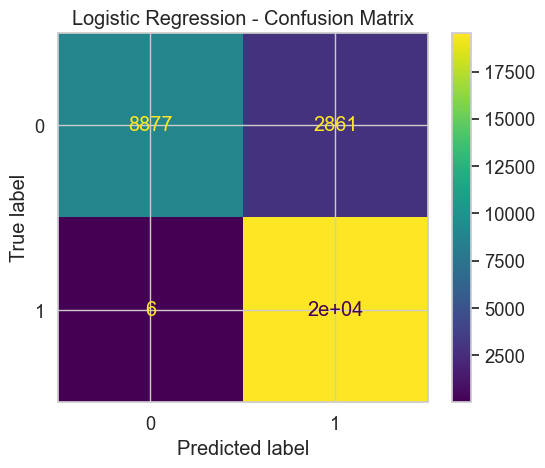

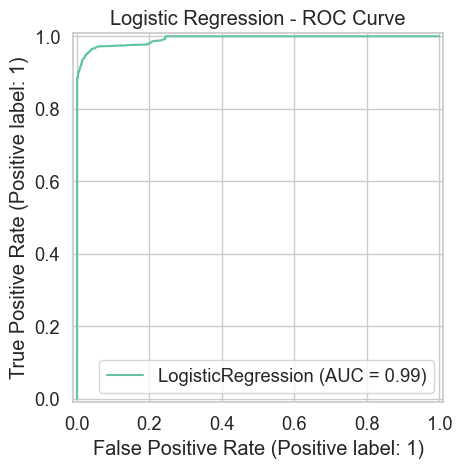

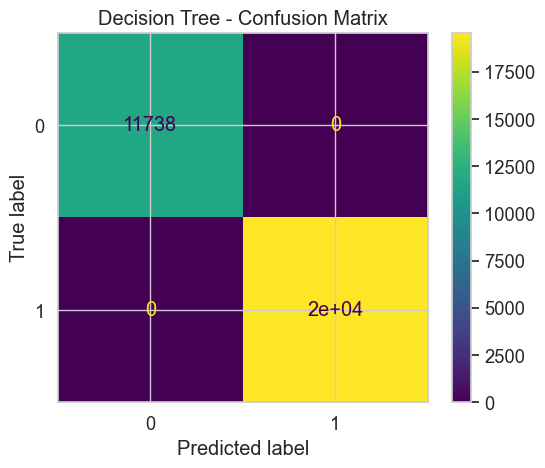

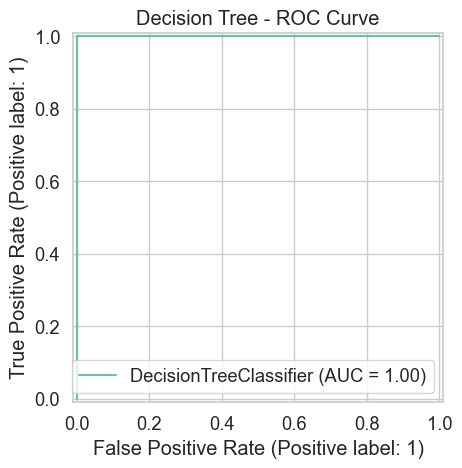

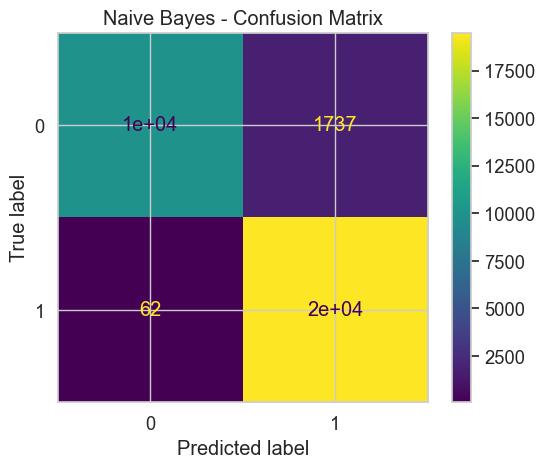

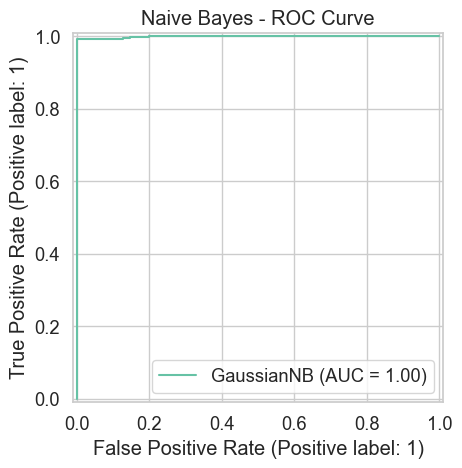

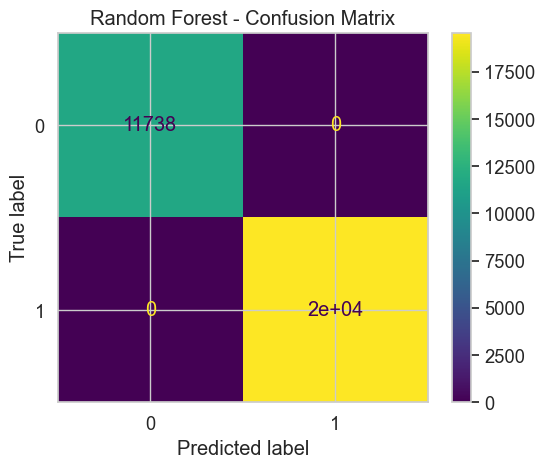

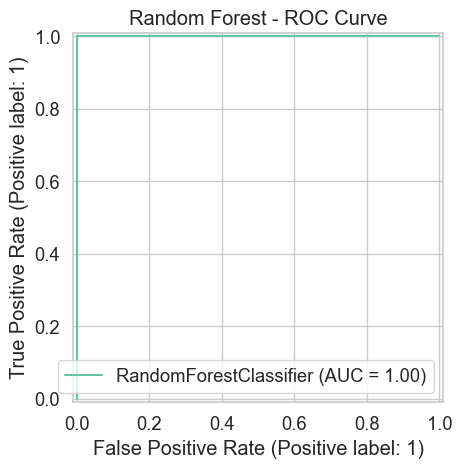

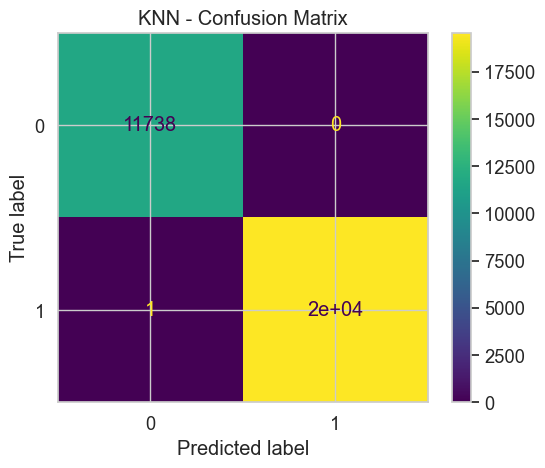

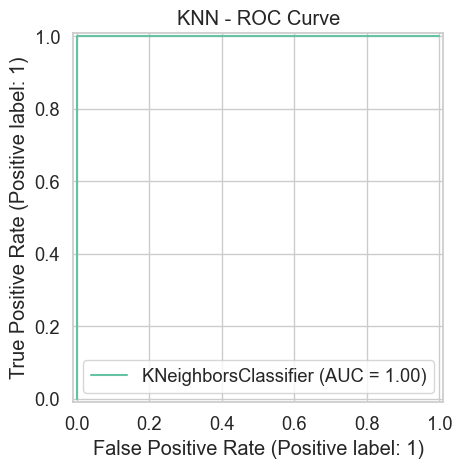

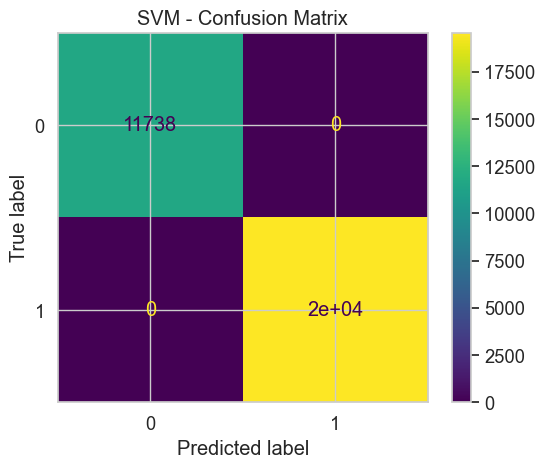

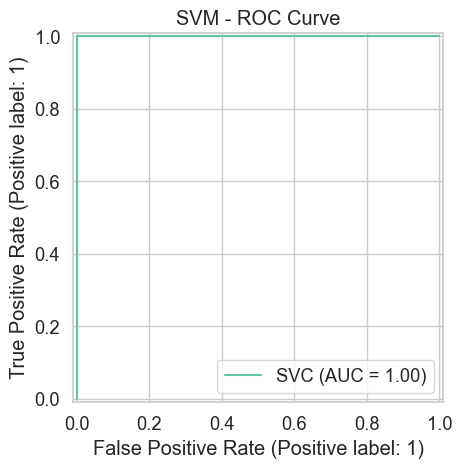

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
3        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
5                  SVM  1.000000   1.000000  1.000000  1.000000  1.000000
4                  KNN  0.999968   1.000000  0.999949  0.999974  1.000000
2          Naive Bayes  0.942526   0.918213  0.996831  0.955908  0.999000
0  Logistic Regression  0.908405   0.872379  0.999693  0.931707  0.992697


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Ensure hybrid_features is defined
# selected_chi2_features is already defined in a previous cell
hybrid_features = list(set(selected_chi2_features) |
                       set(selected_rfe_features) |
                       set(selected_rf_features))

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# Use standardized features for models like KNN and SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_hybrid_scaled = scaler.fit_transform(X_train[hybrid_features])
X_test_hybrid_scaled = scaler.transform(X_test[hybrid_features])

# Metrics storage
results = []

for name, model in models.items():
    # Use scaled features for KNN and SVM, original for others
    if name in ["KNN", "SVM"]:
        model.fit(X_train_hybrid_scaled, y_train)
        y_pred = model.predict(X_test_hybrid_scaled)
        y_proba = model.predict_proba(X_test_hybrid_scaled)[:, 1]
    else:
        model.fit(X_train[hybrid_features], y_train)
        y_pred = model.predict(X_test[hybrid_features])
        y_proba = model.predict_proba(X_test[hybrid_features])[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    
    results.append((name, acc, prec, rec, f1, roc))
    
    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, 
                                          X_test_hybrid_scaled if name in ["KNN", "SVM"] else X_test[hybrid_features], 
                                          y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, 
                                   X_test_hybrid_scaled if name in ["KNN", "SVM"] else X_test[hybrid_features], 
                                   y_test)
    plt.title(f"{name} - ROC Curve")
    plt.show()

# Display metrics comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
print(results_df.sort_values(by="F1-Score", ascending=False))


In [18]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
bagging = BaggingClassifier(estimator=LogisticRegression(solver='liblinear'), n_estimators=50, random_state=42)

models_bagging = {
    "Random Forest": rf,
    "Bagging (LogReg)": bagging
}


In [19]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

models_boosting = {
    "AdaBoost": adaboost,
    "XGBoost": xgb,
    "LightGBM": lgbm
}


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(solver='liblinear')),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42))
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"📊 {name} Metrics:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-score: {f1:.4f} | ROC-AUC: {auc if auc else 'N/A'}\n")
    return name, acc, prec, rec, f1, auc


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"📊 {name} Metrics:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-score: {f1:.4f} | ROC-AUC: {auc if auc else 'N/A'}\n")
    return name, acc, prec, rec, f1, auc


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Silence LightGBM logs
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Silence XGBoost logs
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

from sklearn.ensemble import VotingClassifier

# Define Voting Soft
voting_soft = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(solver='liblinear')),
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='soft'
)

# Dictionary of models
models_boosting = {
    "AdaBoost": ada,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "Bagging (LogReg)": models_bagging["Bagging (LogReg)"],  # Use the defined BaggingClassifier
    "Random Forest": rf,                        # Use the defined RandomForestClassifier
    "Stacking": stacking,                      # Use the defined StackingClassifier
    "Voting Hard": voting_hard,                # Use the defined VotingClassifier
    "Voting Soft": voting_soft                 # Use the defined VotingClassifier
}

# Evaluate and print metrics
for name, model in models_boosting.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    print(f"📊 {name} Metrics:")
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | "
          f"F1-score: {f1:.4f} | ROC-AUC: {roc_auc}")
    print()


📊 AdaBoost Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0

📊 XGBoost Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0

📊 LightGBM Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0

📊 Bagging (LogReg) Metrics:
Accuracy: 0.9583 | Precision: 1.0000 | Recall: 0.9333 | F1-score: 0.9655 | ROC-AUC: 0.9884472225191485

📊 Random Forest Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0

📊 Stacking Metrics:
Accuracy: 0.9857 | Precision: 0.9962 | Recall: 0.9808 | F1-score: 0.9884 | ROC-AUC: 0.9987393529711257

📊 Voting Hard Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: N/A

📊 Voting Soft Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0



In [ ]:
results = []

for name, model in models_boosting.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0

    print(f"📊 {name} Metrics:")
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | "
          f"F1-score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")
    print()

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    })


📊 AdaBoost Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0000

📊 XGBoost Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0000

📊 LightGBM Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0000

📊 Bagging (LogReg) Metrics:
Accuracy: 0.9583 | Precision: 1.0000 | Recall: 0.9333 | F1-score: 0.9655 | ROC-AUC: 0.9884

📊 Random Forest Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0000

📊 Stacking Metrics:
Accuracy: 0.9857 | Precision: 0.9962 | Recall: 0.9808 | F1-score: 0.9884 | ROC-AUC: 0.9987

📊 Voting Hard Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 0.0000

📊 Voting Soft Metrics:
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1-score: 1.0000 | ROC-AUC: 1.0000



<Figure size 1400x700 with 0 Axes>

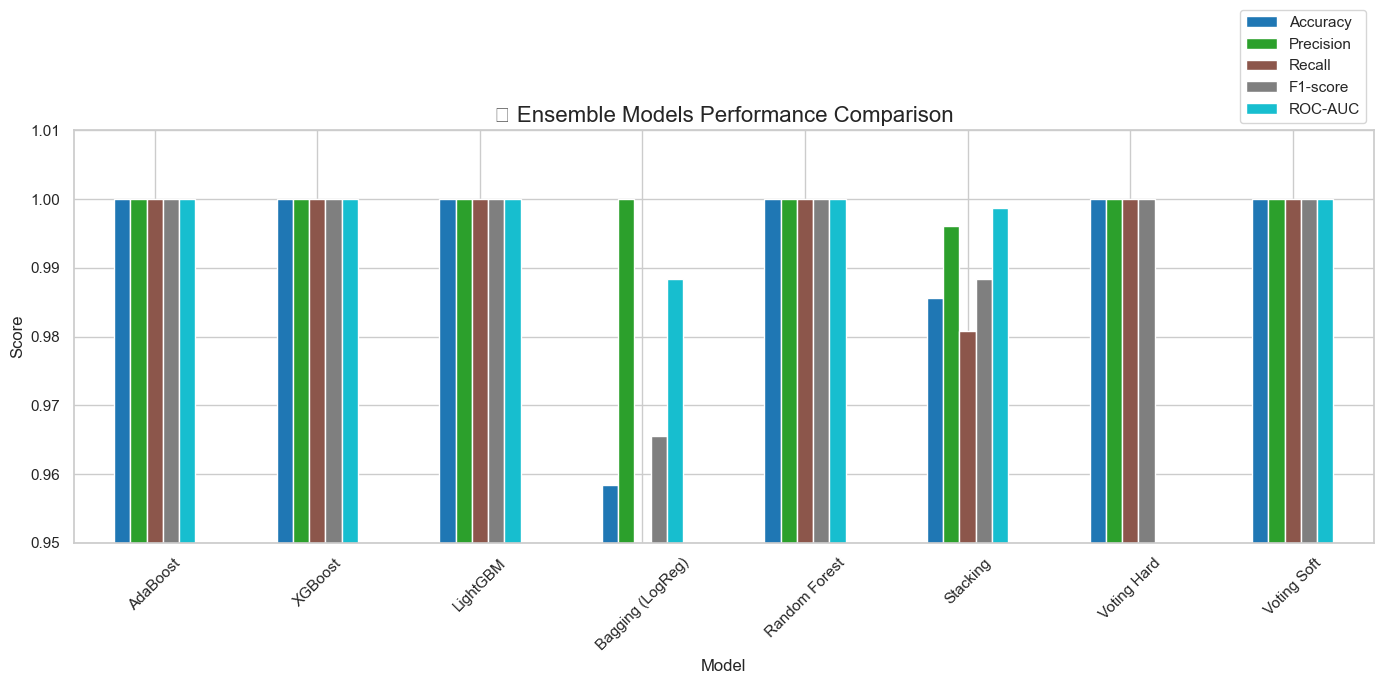

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
df_results = pd.DataFrame(results).set_index("Model")

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
df_results.plot(kind="bar", figsize=(14, 7), colormap="tab10")

plt.title("📊 Ensemble Models Performance Comparison", fontsize=16)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0.95, 1.01)  # Adjust range for your data
plt.legend(loc="lower right", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()
